In [1]:
# CSCI 1133, Lab Section 013, HW8 Jeffery Liu, liu00614 Worksheet 1 Cars
# Partner: Colton Werner, werner486, Lab Section 013

In [2]:
# Task 1 – Worksheet 1
# Purpose: Calculate the average miles per gallon (mpg) for city driving and the average mpg for highway driving.
# Output: A list with two floats will be created. The first float will be the average mpg for city driving and the
#    second the average mpg for highway driving. Your list must be the final thing displayed.

import csv
%precision 3

with open('cars_mpg.csv') as f:
    mpg = list(csv.DictReader(f))

# Testing stuff:
# print(mpg[0].keys())
# print('cty: {}, hwy: {}'.format(mpg[0]['cty'], mpg[0]['hwy']))

# New lists to keep track of city and highway mileages
cty_mpgs = []
hwy_mpgs = []

# Loop through each line of csv, append the city and highway mileages to their respective lists.
for car in mpg:
    cty_mpgs.append(int(car['cty']))
    hwy_mpgs.append(int(car['hwy']))


# Testing stuff:
# print(cty_mpgs)
# print(hwy_mpgs)

# [average city mpg, average highway mpg]
[sum(cty_mpgs)/len(cty_mpgs), sum(hwy_mpgs)/len(hwy_mpgs)]


[16.859, 23.440]

In [3]:
# Task 2 – Worksheet 1

# Purpose: Produce the set of car manufacturers.
# Output: A set with the string names of car manufacturers

manufacturers = set(car['manufacturer'] for car in mpg)
manufacturers

{'allude',
 'chevron',
 'doggie',
 'freeway',
 'honda',
 'hyundai',
 'jeep',
 'land rover',
 'lincoln',
 'mercury',
 'nissan',
 'silver',
 'subbie',
 'tinker',
 'volks'}

In [4]:
# Task 3 – Worksheet 1
# Purpose: Calculate average mpg for city driving and average mpg for hwy driving for each manufacturer.
# Output: A list of two lists, the first one a list for cty, the second for hwy

cty_mpgs_by_manu = []
hwy_mpgs_by_manu = []
for manufacturer in manufacturers:
    x = [int(car['cty']) for car in mpg if car['manufacturer'] == manufacturer]
    cty_mpgs_by_manu.append((manufacturer, sum(x)/len(x)))
    y = [int(car['hwy']) for car in mpg if car['manufacturer'] == manufacturer]
    hwy_mpgs_by_manu.append((manufacturer, sum(y)/len(y)))

avg_mpgs_by_manu = [[x[1] for x in cty_mpgs_by_manu], [x[1] for x in hwy_mpgs_by_manu]]
avg_mpgs_by_manu


[[13.250,
  18.529,
  14.000,
  13.135,
  11.500,
  18.643,
  19.286,
  20.926,
  17.000,
  11.333,
  24.444,
  13.500,
  17.611,
  15.000,
  18.077],
 [18.000,
  24.912,
  19.360,
  17.946,
  16.500,
  26.857,
  25.571,
  29.222,
  26.400,
  17.000,
  32.556,
  17.625,
  26.444,
  21.895,
  24.615]]

In [5]:
# Task 4 – Worksheet 1
# Purpose: Sort the two list of averages above by mpg.
# Output: A list of two lists, the first one a list for cty, the second for hwy, sorted by mpg

for x in avg_mpgs_by_manu:
    x.sort()

avg_mpgs_by_manu

[[11.333,
  11.500,
  13.135,
  13.250,
  13.500,
  14.000,
  15.000,
  17.000,
  17.611,
  18.077,
  18.529,
  18.643,
  19.286,
  20.926,
  24.444],
 [16.500,
  17.000,
  17.625,
  17.946,
  18.000,
  19.360,
  21.895,
  24.615,
  24.912,
  25.571,
  26.400,
  26.444,
  26.857,
  29.222,
  32.556]]

In [6]:
# Task 5 – Worksheet 1
# Purpose: Import the csv file as a pandas DataFrame object. Display the head.
# Output: Head (first five lines) of the DataFrame

import pandas as pd

df = pd.read_csv('cars_mpg.csv', index_col = 0)

df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,allude,excel,1.8,1999,4,auto(l5),f,18,29,p,compact
2,allude,excel,1.8,1999,4,manual(m5),f,21,29,p,compact
3,allude,excel,2.0,2008,4,manual(m6),f,20,31,p,compact
4,allude,excel,2.0,2008,4,auto(av),f,21,30,p,compact
5,allude,excel,2.8,1999,6,auto(l5),f,16,26,p,compact


In [7]:
# Task 6 – Worksheet 1
# Purpose: Find the maximum value for both cty and hwy, using the DataFrame structure.
# Output: A list of two int64, the first the max mileage for cty, and the second max mileage for highway.

[max(df['cty']), max(df['hwy'])]

[35, 44]

In [8]:
# Task 7 – Worksheet 1
# Purpose: Find the average value for both cty and hwy, using the DataFrame structure.
# Output: A DataFrame, with column headings 'mpg_city' and 'mpg_highway', with the respective average below in the
#    first row.

pd.set_option('precision', 3)

avg_in_a_Series = pd.DataFrame({'mpg_city': sum(df['cty']) / len(df['cty']),
                                'mpg_highway': sum(df['hwy']) / len(df['hwy'])}, index = [''])
avg_in_a_Series


,mpg_city,mpg_highway
,16.859,23.44


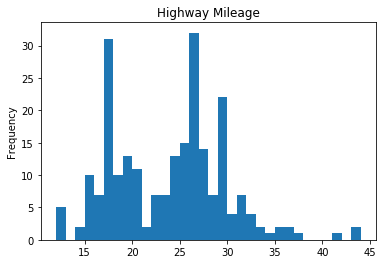

In [12]:
# Task 8 – Worksheet 1
# Purpose: Plot the mpg for highway driving using the DataFrame structure.
# Output: A plot of mpg.

# Histogram plot of hwy mileage by frequency of occurence.
df['hwy'].plot.hist(bins = 32, title = 'Highway Mileage')


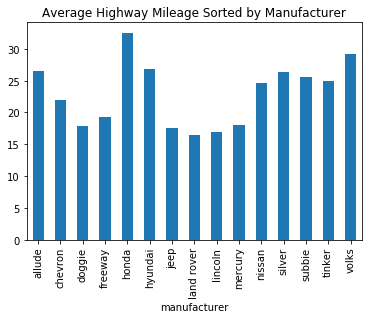

In [10]:
# Bar plot of avg hwy mileage, grouped by manufacturer.
group_manu = df.groupby('manufacturer')
avg_group_manu = group_manu['hwy'].sum() / group_manu['hwy'].count()
avg_group_manu.plot.bar(title = 'Average Highway Mileage Sorted by Manufacturer')


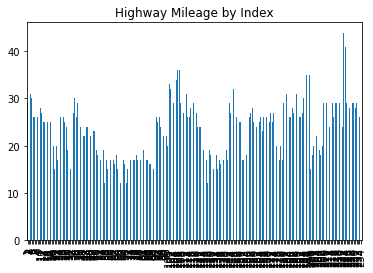

In [11]:
# Bar plot of mileage by index in the DataFrame.
df['hwy'].plot.bar(title = 'Highway Mileage by Index')
